In [2]:
# Smart Factory Energy Prediction Challenge


In [3]:
## 1. Setup and Data Loading

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set random seed for reproducibility
np.random.seed(42)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [5]:
## 2. Load and Examine Data

In [6]:
# Load the data
df = pd.read_csv('../data/data.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

Dataset Shape: (16857, 29)

First few rows:


,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,45.566667,17.166667,55.20,NaN,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,NaN,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,45.890000,NaN,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,94.385668,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [7]:
## 3. Basic Statistics and Data Quality

In [8]:
# Basic statistics
print("Basic Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

# Check data types
print("\nData Types:")
display(df.info())

# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

Basic Statistics:


,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,zone7_humidity,zone8_temperature,zone8_humidity,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,16052.000000,16009.000000,16080.000000,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,34.032621,21.606344,41.853532,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,11.345440,2.974989,12.301530,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,-84.882898,4.502372,-94.385668,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,31.000000,20.500000,38.626667,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,34.230000,21.790000,42.040455,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,38.156667,22.790000,46.003889,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,84.882898,38.626835,94.385668,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617



Missing Values:


equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1                826
random_variable2            


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  f

None


Number of duplicate rows: 68


In [9]:
## 4. Target Variable Analysis

Target Variable Statistics:


count     16013
unique      130
top        50.0
freq       3400
Name: equipment_energy_consumption, dtype: object

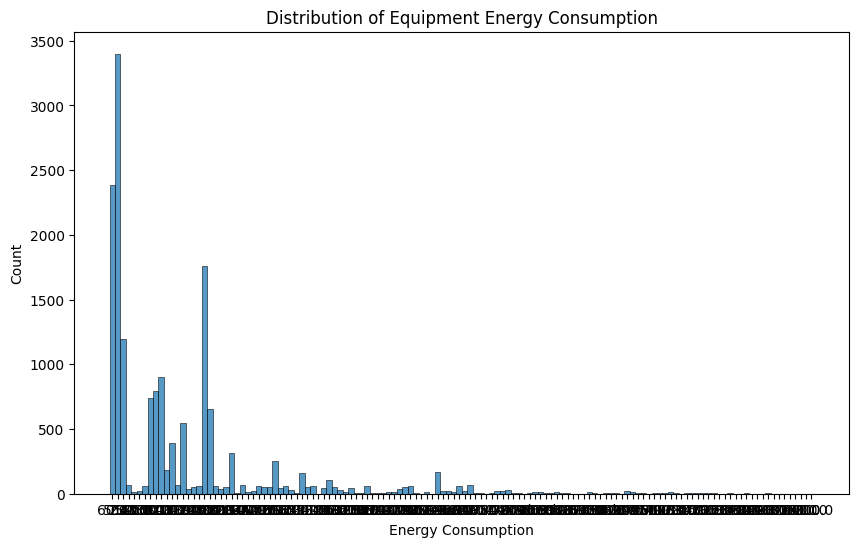

In [10]:
# Target variable statistics
target_stats = df['equipment_energy_consumption'].describe()
print("Target Variable Statistics:")
display(target_stats)

# Plot target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='equipment_energy_consumption', bins=50)
plt.title('Distribution of Equipment Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Count')
plt.show()

In [11]:
## 5. Correlation Analysis

Top 10 correlations with Equipment Energy Consumption:


equipment_energy_consumption    1.000000
zone3_temperature               0.038033
outdoor_temperature             0.033223
zone6_temperature               0.032136
zone8_temperature               0.019716
zone4_temperature               0.017128
wind_speed                      0.011566
zone5_temperature               0.008938
zone5_humidity                  0.007903
zone7_temperature               0.007255
Name: equipment_energy_consumption, dtype: float64

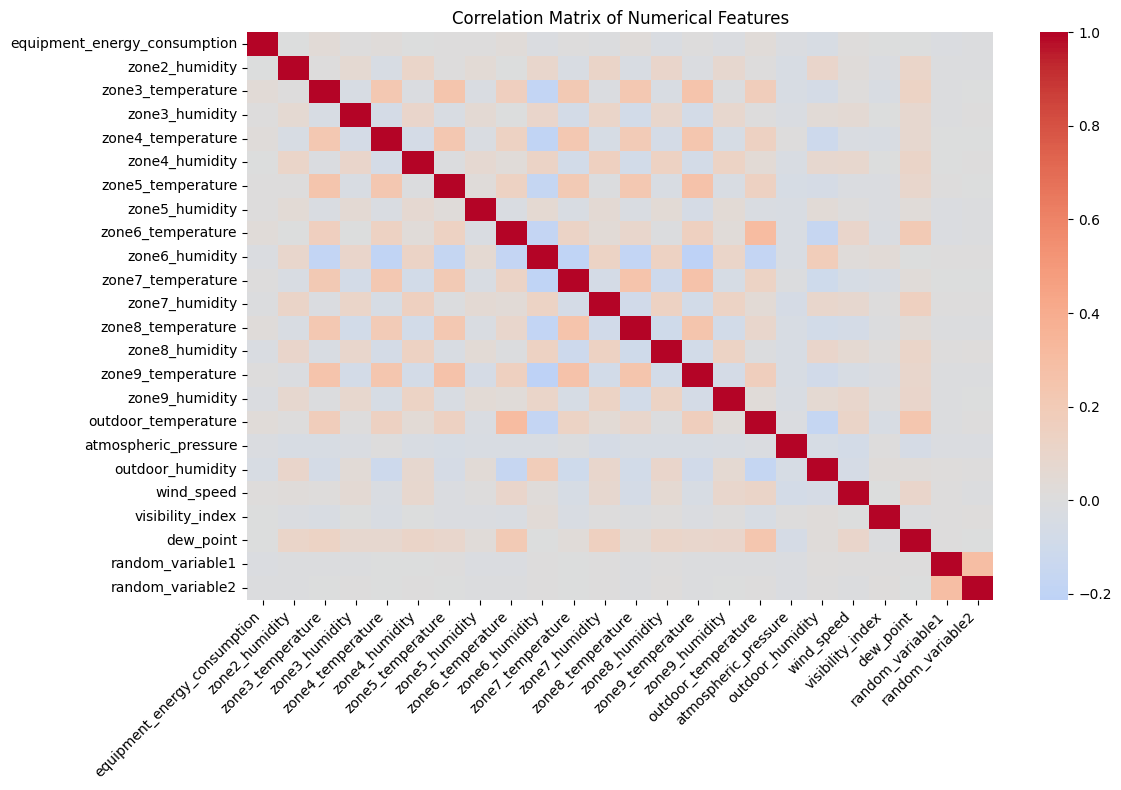

In [12]:
# First convert equipment_energy_consumption to numeric
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')

# Create correlation matrix for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

# Get correlations with target variable
target_correlations = correlation_matrix['equipment_energy_consumption'].sort_values(ascending=False)
print("Top 10 correlations with Equipment Energy Consumption:")
display(target_correlations.head(10))

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
## 6. Feature Analysis

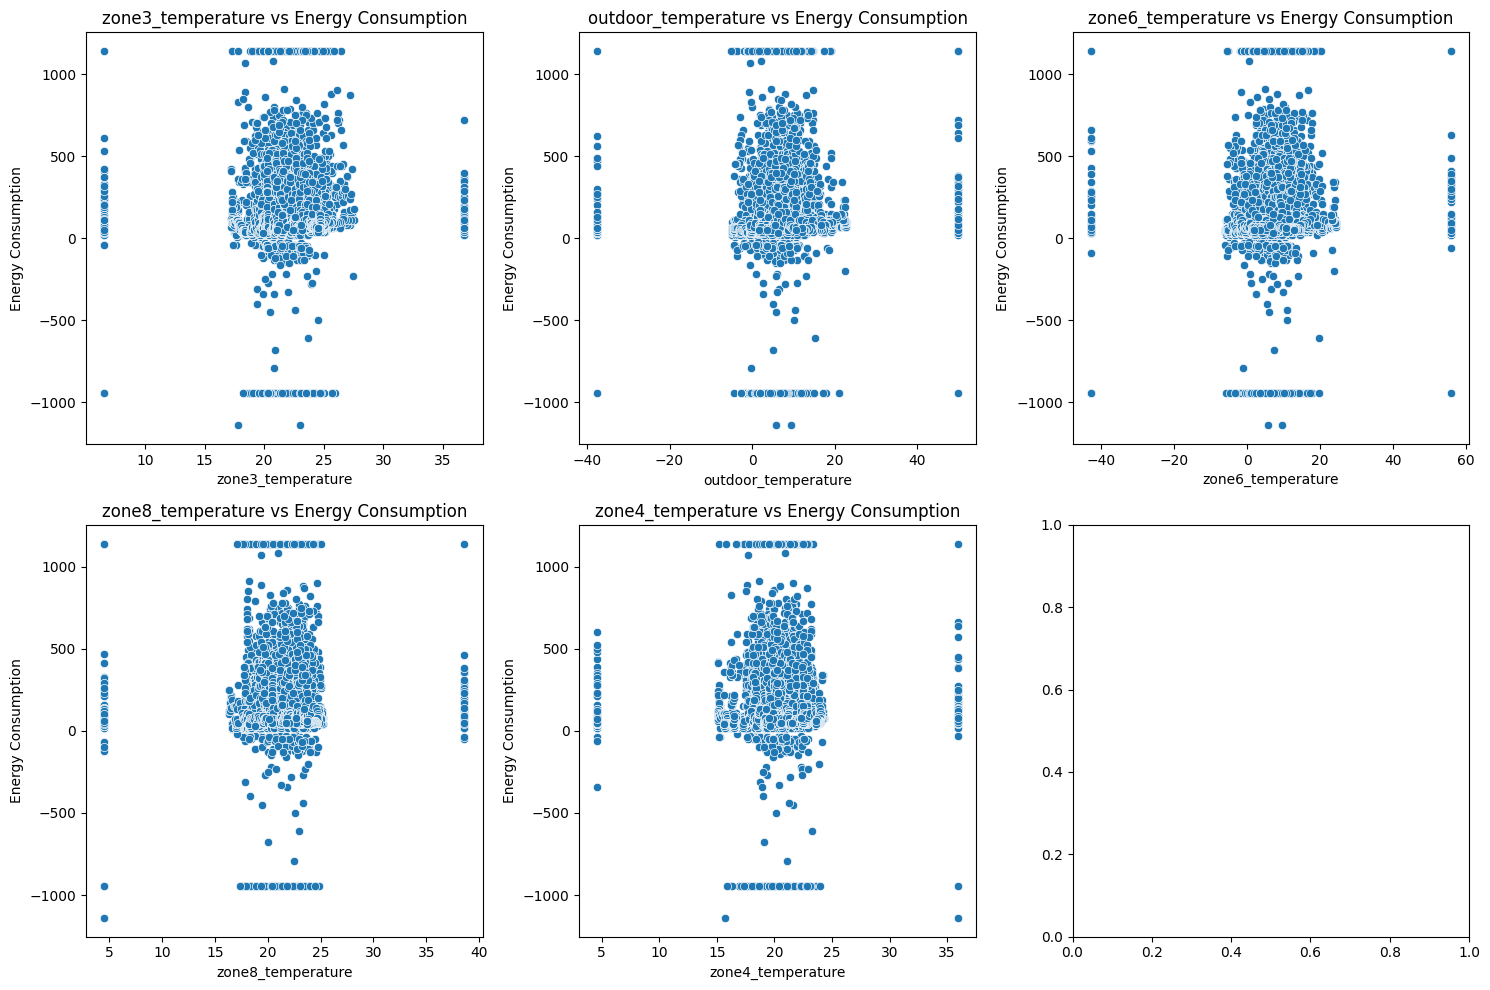

In [14]:
# Plot distributions of top correlated features
top_features = target_correlations.index[1:6]  # Exclude target variable itself

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    sns.scatterplot(data=df, x=feature, y='equipment_energy_consumption', ax=axes[idx])
    axes[idx].set_title(f'{feature} vs Energy Consumption')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Energy Consumption')

plt.tight_layout()
plt.show()

In [15]:
## 7. Data Preprocessing for ML Model

In [16]:
# Convert timestamp to datetime and extract useful features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

# Convert target variable to numeric
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')

# Select features for modeling
feature_columns = [
    'hour', 'day_of_week', 'month',
    'zone1_temperature', 'zone1_humidity',
    'zone2_temperature', 'zone2_humidity',
    'zone3_temperature', 'zone3_humidity',
    'zone4_temperature', 'zone4_humidity',
    'zone5_temperature', 'zone5_humidity',
    'zone6_temperature', 'zone6_humidity',
    'zone7_temperature', 'zone7_humidity',
    'zone8_temperature', 'zone8_humidity',
    'zone9_temperature', 'zone9_humidity',
    'outdoor_temperature', 'atmospheric_pressure',
    'outdoor_humidity', 'wind_speed',
    'visibility_index', 'dew_point'
]

# Convert all features to numeric
for col in feature_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Prepare X and y
X = df[feature_columns]
y = df['equipment_energy_consumption']

# Handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (13485, 27)
Test set shape: (3372, 27)


In [17]:
## 8. Model Training and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }
    
    print(f"{name} Results:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.2f}")

# Compare models
print("\nModel Comparison:")
comparison_df = pd.DataFrame(results).T
display(comparison_df)


Training Linear Regression...
Linear Regression Results:
RMSE: 178.08
MAE: 74.37
R2 Score: 0.01

Training Random Forest...


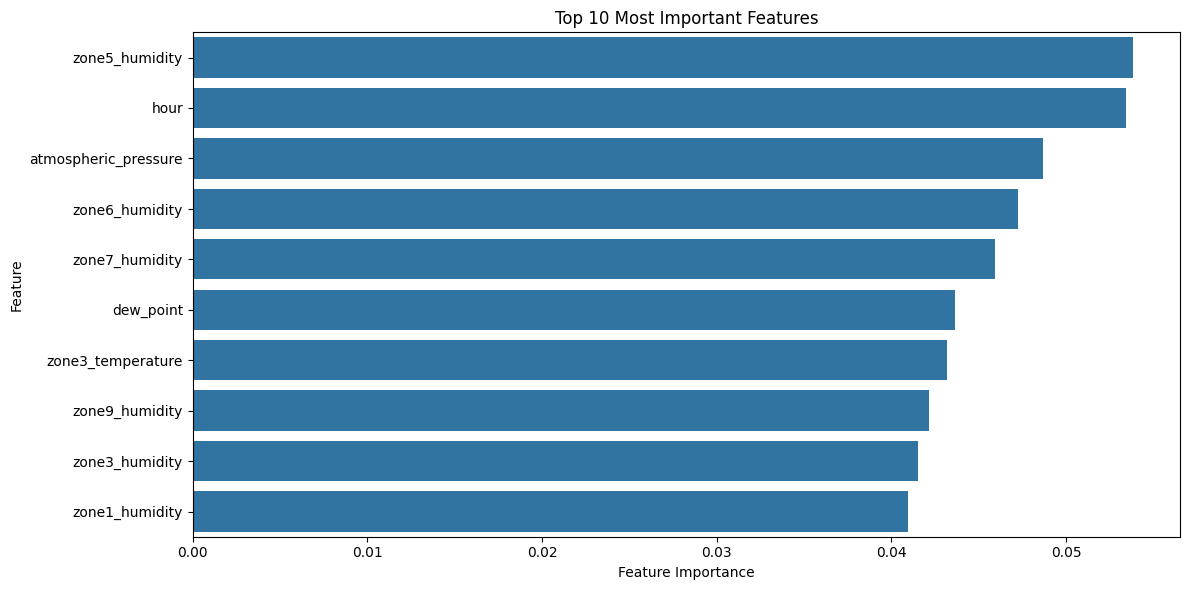

In [18]:
# Feature importance for Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [19]:
## 9. Insights and Recommendations

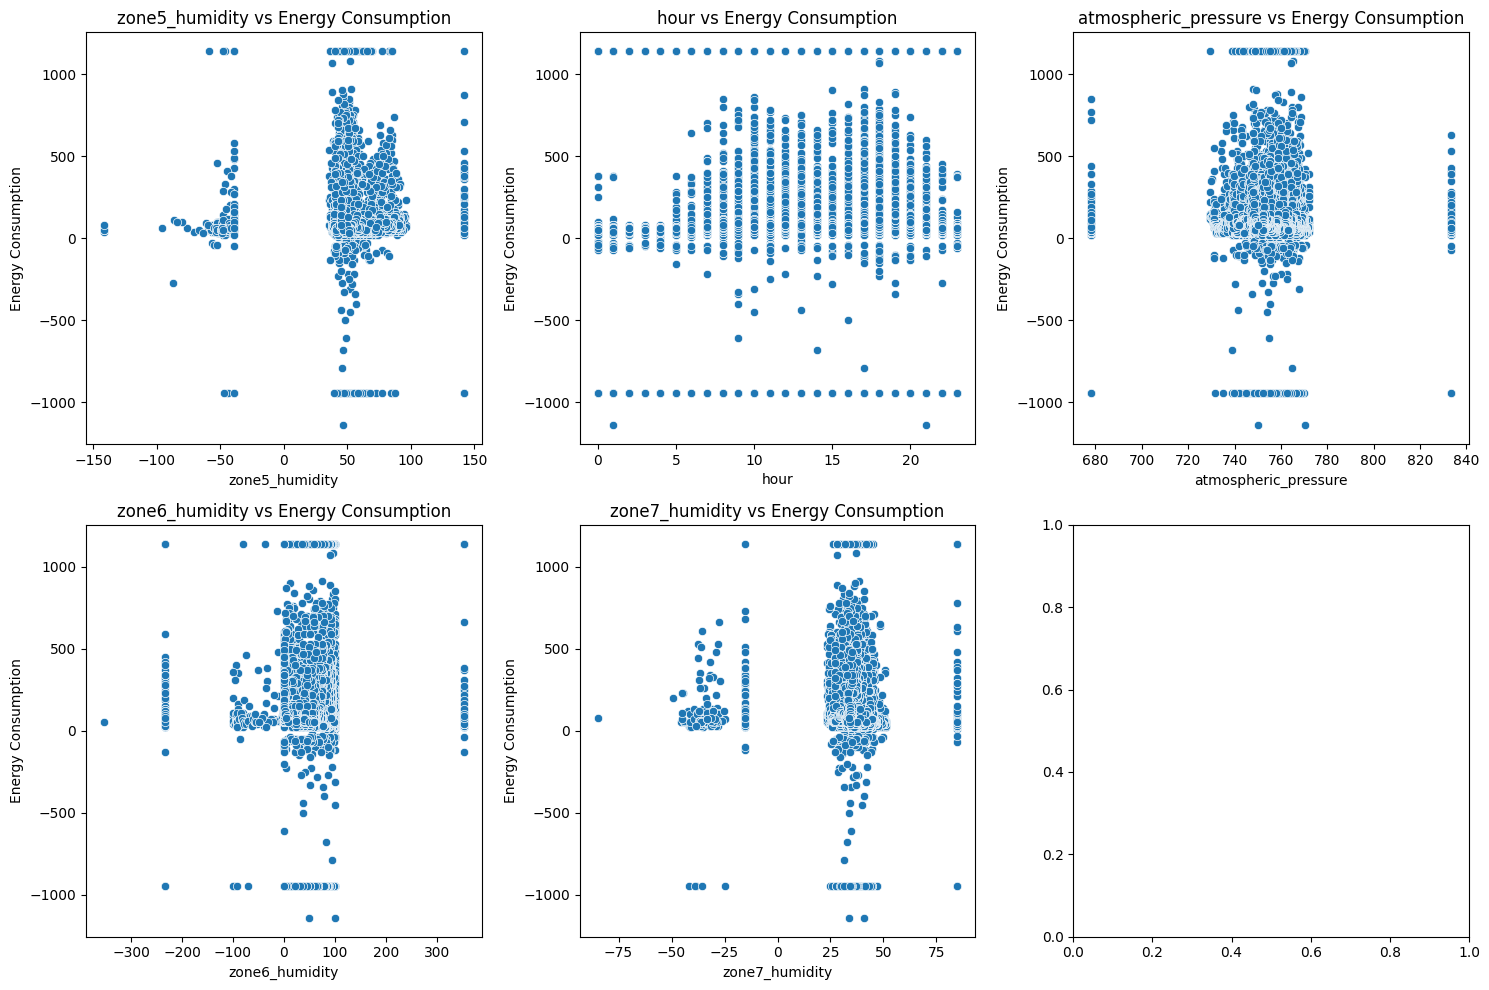


Key Insights and Recommendations:
1. Most Important Features:
   - zone5_humidity
   - hour
   - atmospheric_pressure
   - zone6_humidity
   - zone7_humidity

2. Recommendations for Energy Reduction:
   - Monitor and optimize the top influencing factors
   - Implement automated controls for temperature and humidity in different zones
   - Consider time-based energy optimization based on hour and day patterns
   - Regular maintenance of equipment based on environmental conditions


In [20]:
# Analyze the relationship between top features and energy consumption
top_features = feature_importance['feature'].head(5).tolist()

# Create scatter plots for top features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    sns.scatterplot(data=df, x=feature, y='equipment_energy_consumption', ax=axes[idx])
    axes[idx].set_title(f'{feature} vs Energy Consumption')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Energy Consumption')

plt.tight_layout()
plt.show()

# Print insights
print("\nKey Insights and Recommendations:")
print("1. Most Important Features:")
for feature in top_features:
    print(f"   - {feature}")

print("\n2. Recommendations for Energy Reduction:")
print("   - Monitor and optimize the top influencing factors")
print("   - Implement automated controls for temperature and humidity in different zones")
print("   - Consider time-based energy optimization based on hour and day patterns")
print("   - Regular maintenance of equipment based on environmental conditions")